## Regression (회귀)
### 숫자값 예측이 목적
### 주택에 대한 정보(방의 개수, 크기, 욕실 수 등) -> 주택의 판매가격 예측
### 이미지에서 어떤 항목의 경계 상자의 좌표를 예측
### 인구 통계 (연령, 성별, 인종 등) -> 의료보험 비용 등등 예측

### 입력 (데이터) -> 패턴을 발견하는 신경망 -> 출력 (예측결과)
    ### 1. 분석하기 쉬운 형태로 데이터를 준비  
    ### 2. 패턴을 발견하는 신경망을 만들기
    ### 3. 만든 신경망의 결과를 확인

## 앞으로 우리가 할 일
## 1. 회귀 모델의 아키텍처를 확인
## 2. 입력과 출력의 형태를 생성
###   - 'X' : feature / 데이터 (입력)
###   - 'Y' : 레이블(Lable) (출력)
## 3. 모델링 단계
###   1) 모델 생성
###   2) 모델 컴파일
        ### - 손실 함수 정의
        ### - 최적화 함수 설정
        ### - 평가 지표 생성
###   3) 모델 피팅 (데이터에서 패턴 찾기)
## 4. 모델 평가
    ### 1) 모델 시각화
    ### 2) 학습 곡선 확인
    ### 3) 예측결과를 실제 데이터와 비교 (평가지표 사용)
## 5. 모델 저장(나중의 사용을 위해서) 
## 6. 모델 가져와서 사용하기



## 회귀 신경망의 일반적인 아키텍처
- (신경망을 생성하는 방법은 매우 다양하다. 그래도, 일반적인 방법은 존재)
- 데이터 수집 -> 데이터에서 패턴 찾기 -> 결과 만들기

* Input Layer shape (입력층의 형태) : 특성 (feature, coloumn, variable)의 갯수(shape)
* Hidden Layer (은닉층) : 해결하려는 문제에 따라 최소 1개 이상으로 이루어진다.
* 은닉층 각각을 구성하는 뉴런 : 해결하려는 문제에 따라 최소 10개~ 최대 100개로 이루어진다.
* Output Layer shape (출력층의 형태) : 우리가 예측값을 얻고자 하는 형태 (주택의 가격이라면 1)
* 은닉층의 확성화 함수 : [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)
 (rectified liner unit)
 * 출력층의 활성화 함수 : None, ReLU, logistic/tanh
 * 손실함수 : MSE(Mean Square Error), MAE (Mean Absolute Error) / Huber (MAE와 MSE의 조합) 특이 값들이 있을 때 사용
 * 옵티마이저 (최적화) : SGD (stochastic gradient descent), Adam
터 

- **hyperparameter** *(하이퍼파라미터)* : 머신러닝 분야에서 하이퍼파라미터라는 단어는 데이터 분석가나 개발자들이 설정하는 값

- **parameter** *(파라미터)* : (분석가나 개발자들이 명시적으로 설정한 값이 아닌)모델이 스스로 파악한 값  

In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


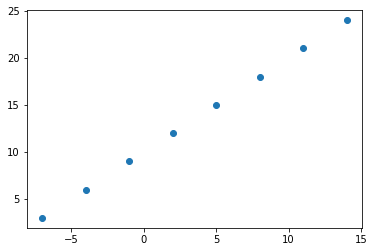

In [34]:
# 회귀 문제 다루기
# feature 특성, 변수
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

- 모델을 만들기 전에 EDA (Explorary Data Analysis) 탐색적 자료분석을 해서  위의 경우 처럼 X와 y의 관계, 즉 패턴을 찾으려고 한다.

- 위 의 패턴이라면 17은 어떤값일까?, -10은 어떤값일까 

## 신경망 (neural network)로 작업을 할 때 가장 중요한 개념
### **input shape (입력의 모양)** : 모델을 만들기 위한 데이터의 형태
### **output shape (출력의 모양)** : 모델을 통해서 예측하고자 하는 데이터의 형태

- 문제에 따라 입력과 출력의 모양은 각각 다르다
- 신경망은 숫자를 입력 받고, 숫자를 출력! 이 때 일반적으로 tensor나 array로 처리한다.


In [35]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [36]:
house_info.shape

TensorShape([3])

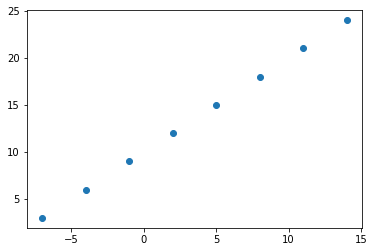

In [37]:
# 회귀 문제 다루기
# feature 특성, 변수
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Label
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [38]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape, type(input_shape), type(output_shape)

(TensorShape([]),
 TensorShape([]),
 tensorflow.python.framework.tensor_shape.TensorShape,
 tensorflow.python.framework.tensor_shape.TensorShape)

In [39]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [40]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # 손실
    optimizer= tf.keras.optimizers.SGD(), # 최적화
    metrics=["mae"] # 평가지표
)

model.fit(X,y, epochs=5) # 모델 적합

Epoch 1/5
1/1 [==============================] - 0s 323ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [41]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [42]:
model.predict([17.0, -10])

array([[12.716021],
       [-7.4006  ]], dtype=float32)

### 위 모델의 결과를 봤을때 , 간단히만 봐도 27.0을 예상했는데 전혀 다른값이 나왔다.
뭔가 모델이 이상하다. 개선을 시키자

## 모델링 과정
### 현재 우리가 알고 있는 데이터, 입력의 shape, 출력의 shape
Tensorflow에서는 일반적으로 모델을 생성하고 학습할 때 3단계를 실행

1. ** 모델 정의 ** :  우리가 직접 신경망 (neural network)를 구성하는 레이어를 정의하거나 (전이학습시) 이전에 만들어 놓은 모델을 불러온다. 
2. ** 모델 컴파일 ** : 모델이 어떻게 실행될지 정의, 측정값(손실함수, metric)과 개선을 하는 방법 (Optimizer) 정의
3. ** 모델 피팅 ** : 데이터에서 패턴을 찾도록 모델에게 일을 시킴 (X가 어떻게 y가 될까?)


In [43]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # 손실
    optimizer= tf.keras.optimizers.SGD(), # 최적화
    metrics=["mae"] # 평가지표
)

model.fit(X,y, epochs=200) # 모델 적합

Epoch 1/200
1/1 [==============================] - 1s 609ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/200
1/1 [==============================] - 0s 4

In [44]:
model.predict([17.0, -10])

array([[ 30.908516],
       [-15.668092]], dtype=float32)

In [45]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [46]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [47]:
# 원래 X, y의 관계는 y = X + 10의 관계


In [48]:
len(X), len(y)

(50, 50)

In [49]:
# 보통 학습 및 테스트 데이터를 나눌때 80:20의 비율을 사용
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = X[40:]

len(X_train), len(y_train)

(40, 40)

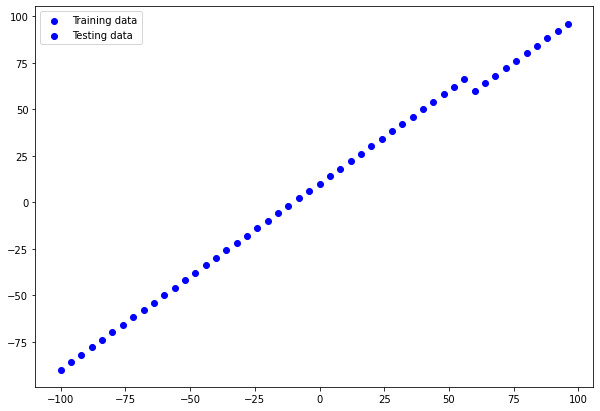

In [50]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='b', label="Testing data")
plt.legend()


In [51]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # 손실
    optimizer= tf.keras.optimizers.SGD(), # 최적화
    metrics=["mae"] # 평가지표
)

model.fit(X_train, y_train, epochs=100) # 모델 적합

Epoch 1/100
2/2 [==============================] - 1s 2ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

In [52]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 모델 개선시키기
현재까지 생성한 모델을 기반으로 개선을 시킨다라는 개념
1. **모델 정의 부분** :레이어를 추가하거나, 레이어를 이루는 neurton 단위 추가, 활성 함수 변경
2. **모델 컴파일** : optimizer를 변경, 최적화 함수를 수행하는 learing rate를 변경
3. **모대**

In [53]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss = tf.keras.losses.mae, # 손실
    optimizer= tf.keras.optimizers.SGD(), # 최적화
    metrics=["mae"] # 평가지표
)


In [54]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train, y_train, epochs=100) # 모델 적합


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

In [56]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [57]:
y_predicts = model.predict(X_test)
y_predicts

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [58]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    prediction = y_predicts
):
    plt.figure(figsize= (10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, prediction, c="r", label="Prediction")
    plt.legend()

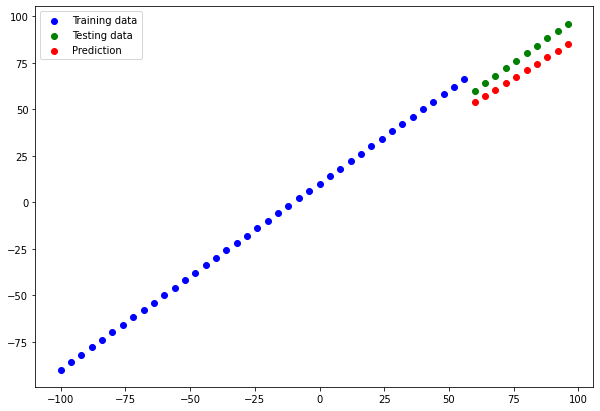

In [59]:
plot_predictions()

In [60]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 159ms/step - loss: 8.7453 - mae: 8.7453


[8.745327949523926, 8.745327949523926]

In [61]:
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_predicts
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([24.42891  , 20.943668 , 17.566742 , 14.783915 , 12.692767 ,
       11.201083 , 10.303493 , 10.       , 10.290602 , 11.1753025],
      dtype=float32)>

# 잠듬

NameError: name '듬' is not defined

# 모델 개선


## 모델이 평가한 예측도 살펴보고, metric도 평가해 본 후에 우리는 개선하기를 원한다.
### 개선시 주로 활용할 수 있는 3가지 방법
* 1. 더많은 데이터 : 모델이 학습할 때 데이터를 주면 줄 수록 모델이 패턴을 찾을 기회는 많아진다.
* 2. 모델을 더 확장 : 좀더 복잡한 모델로 만든다.(고급모델) : 레이어를 추가하거나, 각 레이어를 이루는 뉴런의 갯수를 조정
* 3. 더 오래 학습을 한다 : 데이터에 숨겨진 패턴을 찾는데 더 많은 기회를 얻을 수 있다.


## 실습용 모델 3개
1. model_1 : 원래 모델 그대로 사용 : layer 1개, epoch : 100
2. model_2 : layer 2개, epoch : 100
3. model_3 : layer 2개, epoch : 500


## model_1 생성

In [65]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae, # 손실
    optimizer= tf.keras.optimizers.SGD(), # 최적화
    metrics=["mae"] # 평가지표
)

model_1.fit(X_train, y_train, epochs=100) # 모델 적합

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - 

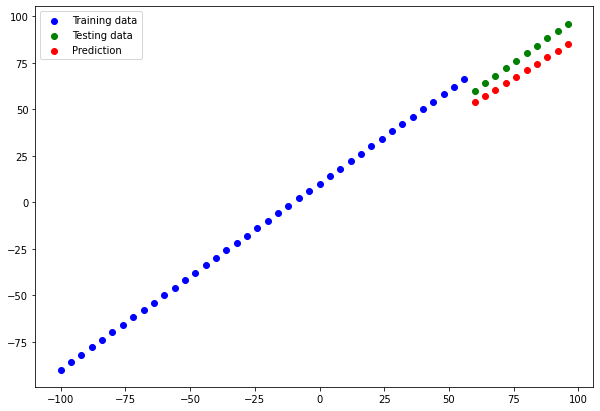

In [66]:
plot_predictions()

## model_2

In [67]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([  
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae, # 손실
    optimizer= tf.keras.optimizers.SGD(), # 최적화
    metrics=["mae"] # 평가지표
)

model_2.fit(X_train, y_train, epochs=100, verbose=0) # 모델 적합

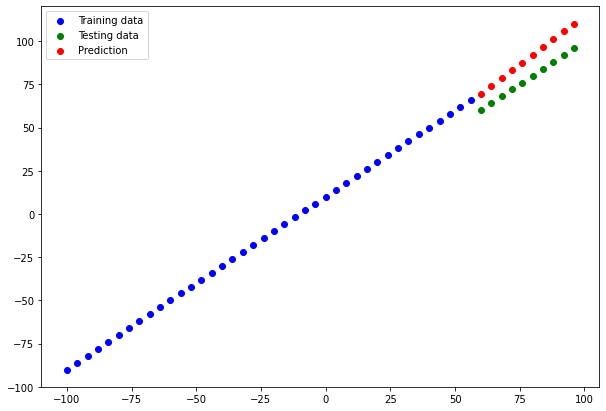

In [69]:
y_predicts_2 = model_2.predict(X_test)
plot_predictions(prediction = y_predicts_2)

In [70]:
mas_2 = mae(y_test, y_predicts_2.squeeze()).numpy()
mss_2 = mse(y_test, y_predicts_2.squeeze()).numpy()
mae_2, mse2

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

## [tesorflow에서 모델저장](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format)

In [5]:
# SavedModel 형식
model_2.save("best_model_Saved_Model_format")

NameError: name 'model_1' is not defined

In [72]:
# HDF5 형식
model_2.save("best_model_HDF5_format.h5")

## 저장된 모델 불러오기
load_model()

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [2]:
# SaveModel 형식의 모델을 불러오기
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

OSError: SavedModel file does not exist at: best_model_SavedModel_format/{saved_model.pbtxt|saved_model.pb}